In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("data/attacks.csv", encoding = "ISO-8859-1", dtype=object)

data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean and scrub de data to work with.

In [207]:
data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [208]:
data.rename(columns = {"fatal_(y/n)":"death"}, inplace=True)

In [243]:
data['sex_'].fillna('undefined', inplace=True)

C:\Users\ateso\AppData\Local\Temp\ipykernel_12192\1413276954.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sex_'].fillna('undefined', inplace=True)


In [361]:
data['year'] = pd.to_numeric(data['year'].replace('0000', pd.NA, regex=False), errors='coerce')
average_year = data['year'].mean()
data['year'].fillna(average_year, inplace=True)

C:\Users\ateso\AppData\Local\Temp\ipykernel_12192\3850090672.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['year'].fillna(average_year, inplace=True)


In [253]:
data.columns = [i.lower().replace(" ", "_").strip() for i in data.columns]

data['age'] = pd.to_numeric(data['age'], errors='coerce')
                
data['age'].fillna(data['age'].mean(), inplace=True)
                
#Had some issues to .fillna as apparently i cant do it in a copy, so had to come back here and scrub some more.

C:\Users\ateso\AppData\Local\Temp\ipykernel_12192\3859286274.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)


In [363]:
data['year'] = data['year'].astype(int)

data.sample(20)

,year,type,country,area,activity,name,sex_,age,injury,death,species_,investigator_or_source,index
3380,1970,Unprovoked,USA,Florida,Surfing,Robbie Baker,M,27.368359,Bitten on right leg above the ankle,N,NaN,"H. Wessel, Orlando Sentinel, 8/1/2001",3379
4673,1943,Invalid,PACIFIC OCEAN,NaN,B-24 crashed during a search mission. Survivor...,Louis Zamperini & Russell Phillips,M,27.368359,Survived,NaN,Invalid,G.A. Llano,4672
3936,1961,Boat,AUSTRALIA,New South Wales,Fishing for mackerel,boat,undefined,27.368359,"No injury to occupant, shark took hooked fish ...",N,NaN,"Brisbane Courier Mail, 12/30/1961",3935
3715,1963,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Standing,Barbara Elsa Strauss,F,20.000000,"Right hand & foot severed, thigh & buttock lac...",N,"Zambesi shark, 1.8 m [6']","B. Strauss, D. Davies, 121-122; Daily Dispatch...",3714
5053,1930,Sea Disaster,MAURITIUS,NaN,Swimming to shore after a squall capsized the...,"males, shark fishermen",M,27.368359,Five men were said to have been killed by sharks,Y,NaN,"NY Times, 1/14/1930, p.8, col.3; V.M. Coppleso...",5051
2507,1993,Sea Disaster,TONGA,Tongapatu Group,Sea disaster,Siale Sime,M,27.368359,Foot bitten,N,1.5 m [5'] shark,"Tongan Chronicle, 2/26/1993",2506
514,2014,Unprovoked,AUSTRALIA,Western Australia,Spearfishing,Adam Haling,M,31.000000,Lacerations to face and neck,N,reef shark,"Herald Sun, 8/21/2014",515
5214,1922,Provoked,USA,New Jersey,Hoisting shark aboard fishing boat,male,M,27.368359,Shark's tail broke his leg. PROVOKED INCIDENT,N,NaN,"Ref in New York Herald Tribune, 8/23/1960; V.M...",5212
2173,1998,Provoked,SOUTH AFRICA,Transvaal,Moving a shark in a net,Kobus Goosen,M,27.368359,Lacerations to right shin PROVOKED INCIDENT,N,"Sandtiger shark, 2 m, male","Daily Dispatch, 8/13/1998",2172
2473,1993,Unprovoked,EL SALVADOR,La Libertad,Surfing,Mauricio Guzman Castaneda,M,17.000000,"FATAL, arms & legs bitten, then drowned",Y,NaN,"Tampa Tribune, 9/18/1993",2472


# Drop the columns and raws that are not usefull.

In [398]:
#Recicled the code and just changed the columns name to drop them.
data.drop(['investigator_or_source'], axis=1, inplace=True)
    pass


IndentationError: unexpected indent (2814708345.py, line 3)

In [399]:
columns_check = ['year', 'type', 'country', 'area',
       'activity', 'sex_', 'age', 'injury', 'death',
       'species_']

In [400]:
data.columns

Index(['year', 'type', 'country', 'area', 'activity', 'sex_', 'age', 'injury',
       'death', 'species_', 'index'],
      dtype='object')

In [230]:
data = data.drop_duplicates(subset= columns_check, keep = "first")

#Dropped the las columns that had no relevant data.
data.drop([6302], inplace=True)
    pass


,year,type,country,area,activity,name,sex_,age,injury,death,species_,investigator_or_source
6298,0000,Unprovoked,AUSTRALIA,Western Australia,Pearl diving,Ahmun,M,27.368359,FATAL,Y,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,0000,Unprovoked,USA,North Carolina,Swimming,Coast Guard personnel,M,27.368359,FATAL,Y,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,0000,Unprovoked,PANAMA,NaN,NaN,Jules Patterson,M,27.368359,FATAL,Y,NaN,"The Sun, 10/20/1938"
6301,0000,Unprovoked,CEYLON (SRI LANKA),Eastern Province,Swimming,male,M,15.000000,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,S.W. Baker
6302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.368359,NaN,NaN,NaN,NaN


In [357]:
data['index'] = range(1, len(data) + 1)
    pass


IndentationError: unexpected indent (2100374653.py, line 2)

# Create subsets of data to compartiment and visualize the DataFrame.

In [360]:
data.sort_values('year', inplace=True)

data['year'] = pd.to_numeric(data['year'].replace('0000', pd.NA, regex=False), errors='coerce')
average_year = data['year'].mean()
data['year'].fillna(average_year, inplace=True)

C:\Users\ateso\AppData\Local\Temp\ipykernel_12192\1445742954.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['year'].fillna(average_year, inplace=True)


In [598]:
data.head()

,year,type,country,area,activity,sex_,age,injury,death,species_,index
6301,1966,Unprovoked,CEYLON (SRI LANKA),Eastern Province,Swimming,M,15.000000,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,6299
6209,1966,Unprovoked,VENEZUELA,Los Roques Islands,Spearfishing,M,27.368359,"FATAL (x3), one survived with minor injuries",Y,said to involve 2.5 m hammerhead sharks,6207
6210,1966,Unprovoked,USA,Florida,Wade-fishing,M,27.368359,"No injury, shark rammed his back",N,NaN,6208
6211,1966,Unprovoked,GREECE,Dodecanese Islands,Free diving for sponges,M,27.368359,FATAL,Y,NaN,6209
6212,1966,Boat,MOZAMBIQUE,Inhambane Province,Fishing,undefined,27.368359,"No injury to occupants, shark bumped boat",N,Whale shark,6210


# Create an personalize the plots according to the DataFrame

- Search trough the data and include fillnan() or other methods if necessary.
- Unique values will need to be shown to understand how to organize the graphics, use .unique(), .mean(), .count()

In [267]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")


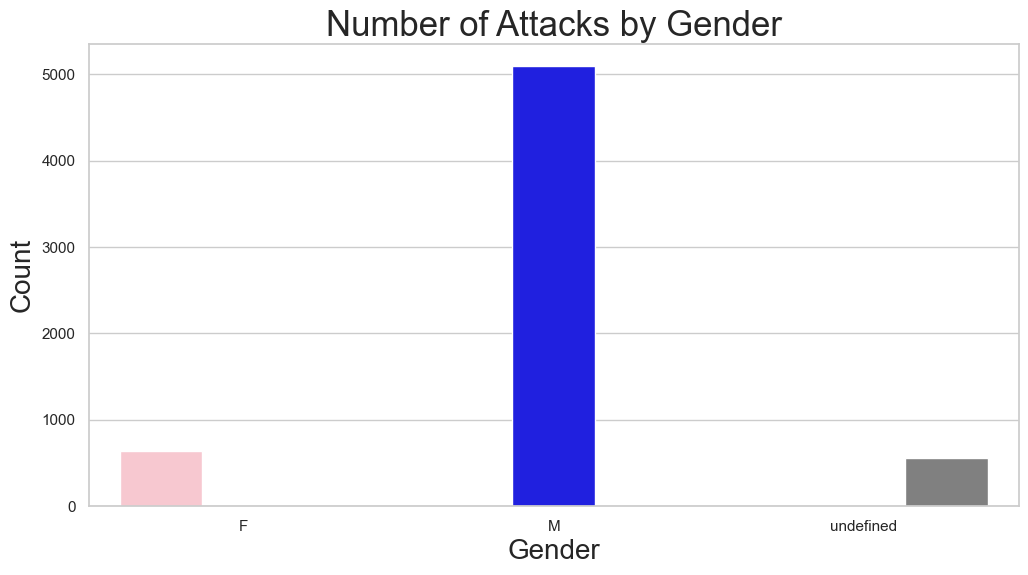

In [531]:

# Filter data to include only 'F', 'M', and 'Undefined'
filtered_data = data[data['sex_'].isin(['F', 'M', 'undefined'])]

# Get unique values in the filtered 'sex_' column
unique_values = filtered_data['sex_'].unique()

# Generate a custom palette with blue for 'M', pink for 'F', and gray for 'Undefined'
palette = {'M': 'blue', 'F': 'pink', 'undefined': 'gray'}

# Create a bar plot comparing the number of attacks for 'F', 'M', and 'Undefined' with the custom palette
ax = sns.barplot(x='sex_', y='count', data=filtered_data.groupby('sex_').size().reset_index(name='count'), palette=palette, hue='sex_', dodge=True)

# Customize the plot
ax.set_title('Number of Attacks by Gender', fontsize=25 )
ax.set_xlabel('Gender', fontsize=20)
ax.set_ylabel('Count', fontsize=20)

# Show the plot
plt.show()



In [299]:
data.groupby("year")["age"].mean().round()

year
0000       27.0
0005       27.0
0077       27.0
0500       27.0
1543       27.0
           ... 
2015       30.0
2015.00    38.0
2016       32.0
2017       30.0
2018       31.0
Name: age, Length: 250, dtype: float64

In [309]:
data.describe()

,age
count,6299.000000
mean,27.368359
std,10.170505
min,1.000000
25%,22.500000
50%,27.368359
75%,27.368359
max,87.000000


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500'),
  Text(0, 4000.0, '4000')])

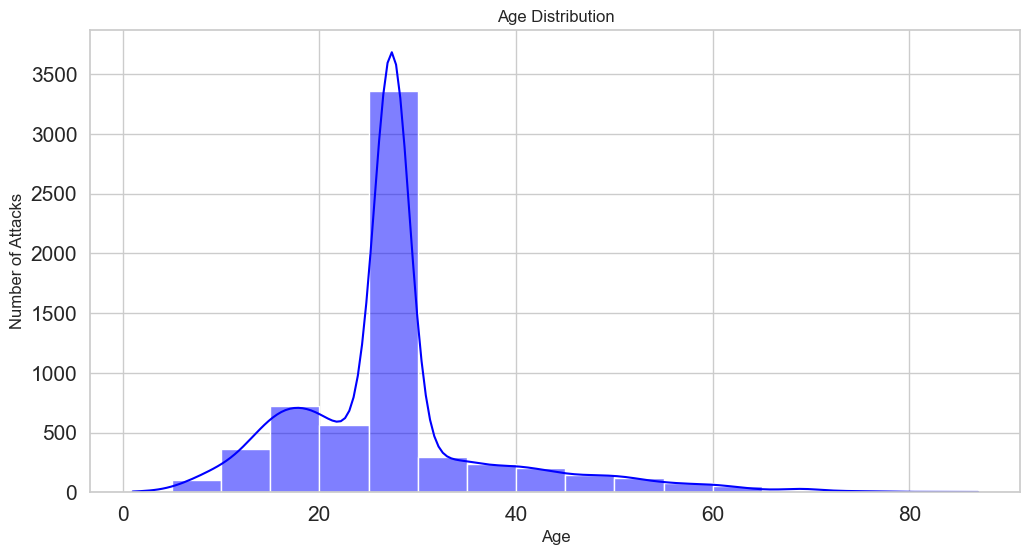

In [552]:
sns.histplot(data["age"], bins=range(5, 70, 5), kde=True, color='blue')

plt.xlabel("Age")
plt.ylabel("Number of Attacks")
plt.title("Age Distribution")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

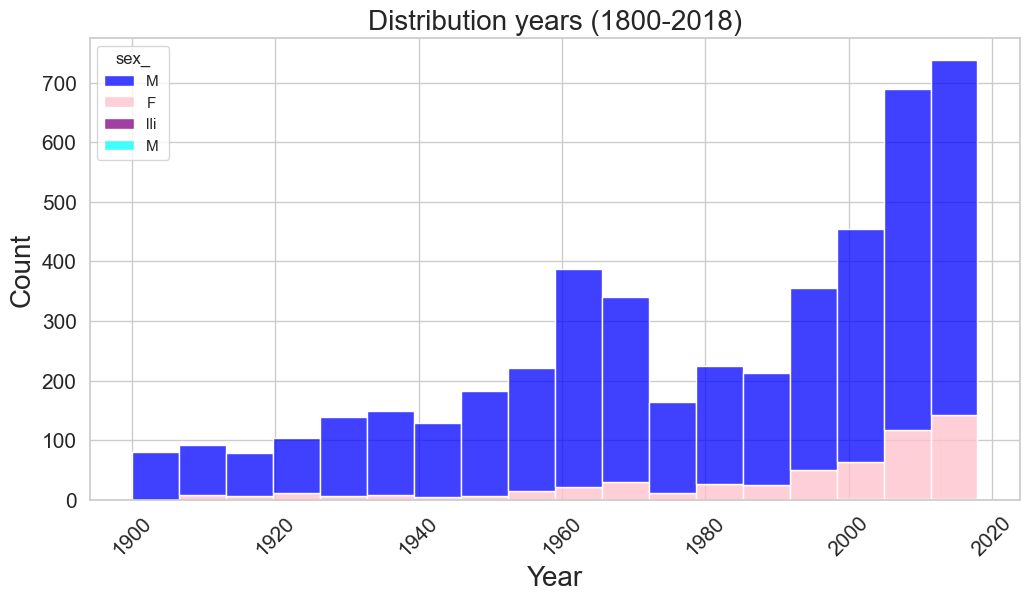

In [595]:
filtered_data = data[(data['year'] >= 1900) & (data['year'] <= 2018) & ~data['sex_'].isin(['N', '.', 'undefined'])]

palette = {'M': 'blue', 'F': 'pink', 'M ': 'cyan', 'lli': 'purple'}

sns.histplot(data=filtered_data, x='year', hue='sex_', multiple="stack", bins=18, palette=palette)

plt.title('Distribution years (1800-2018)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45);




In [518]:
data["type"].unique()

array(['Unprovoked', 'Boat', 'Provoked', 'Invalid', 'Sea Disaster',
       'Boating', nan, 'Boatomg', 'Questionable'], dtype=object)

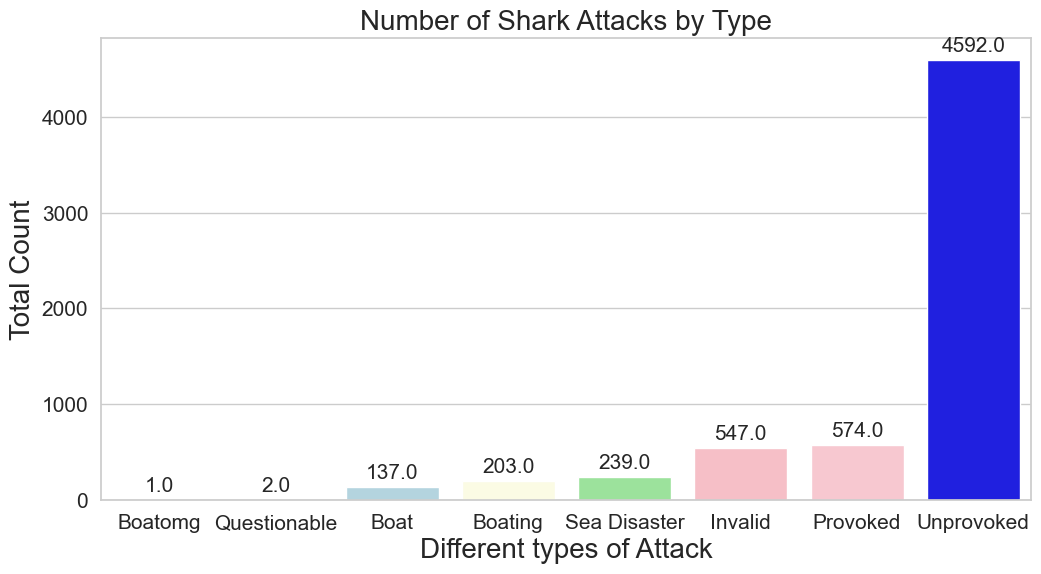

In [556]:

custom_palette = {'Unprovoked': 'blue', 'Boat': 'lightblue', 'Provoked': 'pink', 'Invalid': 'lightpink', 'Sea Disaster': 'lightgreen', 'Boating': 'lightyellow', 'Boatomg': 'yellow', 'Questionable': 'lightgray'}

filtered_data = data[data['type'].isin(custom_palette.keys())]
sorted_data = filtered_data['type'].value_counts().index
reversed_data = list(reversed(sorted_data))

ax = sns.countplot(x='type', hue='type', data=filtered_data, palette=custom_palette, dodge=False, order=reversed_data, legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)

ax.set_title('Number of Shark Attacks by Type', fontsize=20)
ax.set_xlabel('Different types of Attack', fontsize=20)
ax.set_ylabel('Total Count', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);


In [599]:
data["species_"].unique()

array([nan, 'said to involve 2.5 m hammerhead sharks', 'Whale shark', ...,
       'Grey reef shark. 2 m', 'Juvenile bull shark',
       'Juvenile white shark,  2.7 to 3.2 m'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


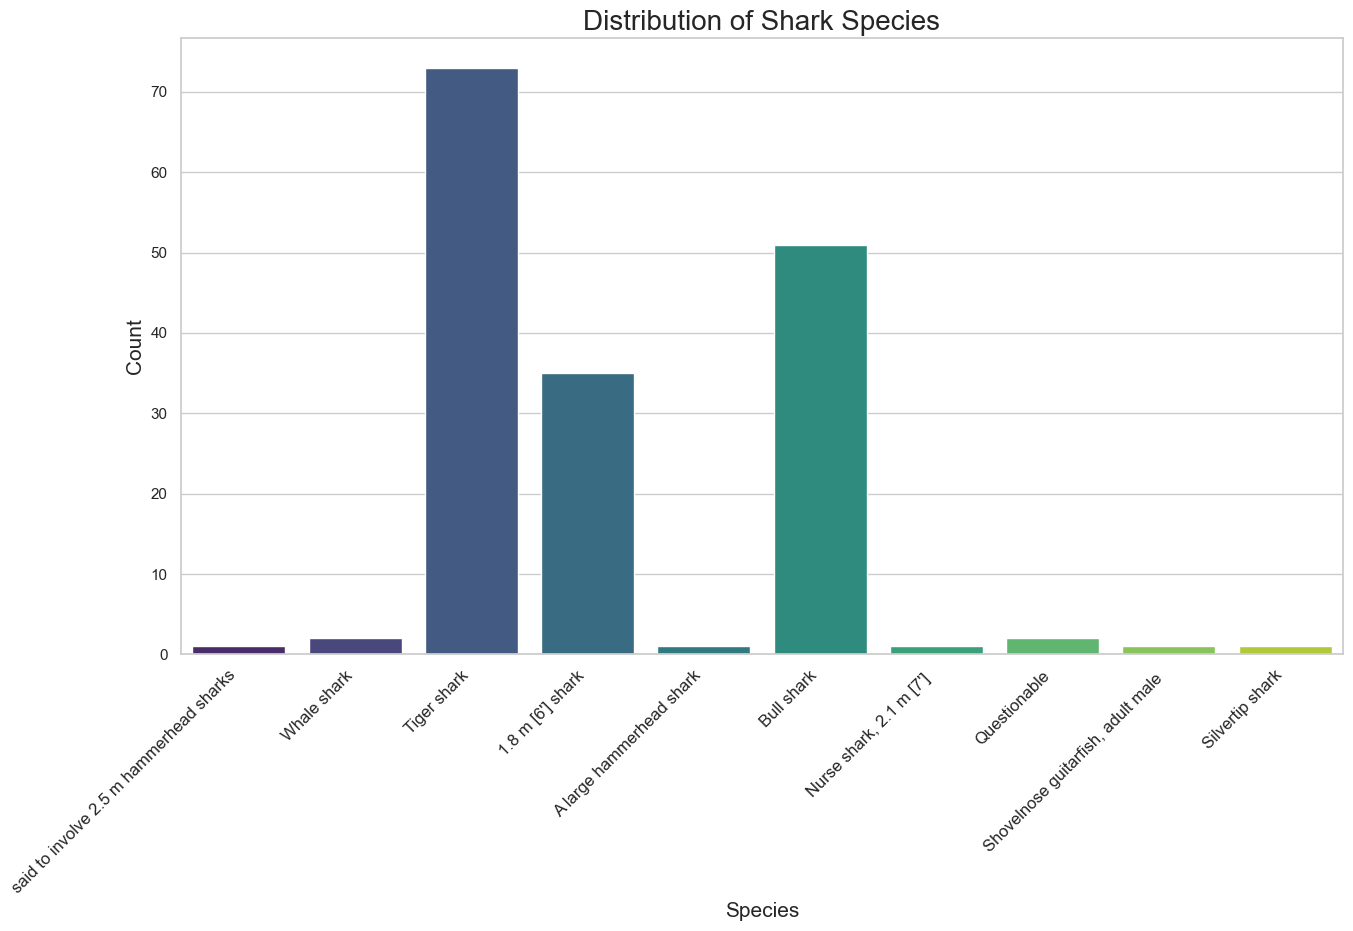

In [603]:
shark_type = data[data['species_'].notnull()] 
subset_values = shark_type['species_'].unique()[:10]  
filtered_data = shark_type[shark_type['species_'].isin(subset_values)]


plt.figure(figsize=(15, 8))
sns.countplot(x='species_', hue='species_', data=filtered_data, palette='viridis', dodge=False)

plt.title('Distribution of Shark Species', fontsize=20)
plt.xlabel('Species', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend().set_visible(False);


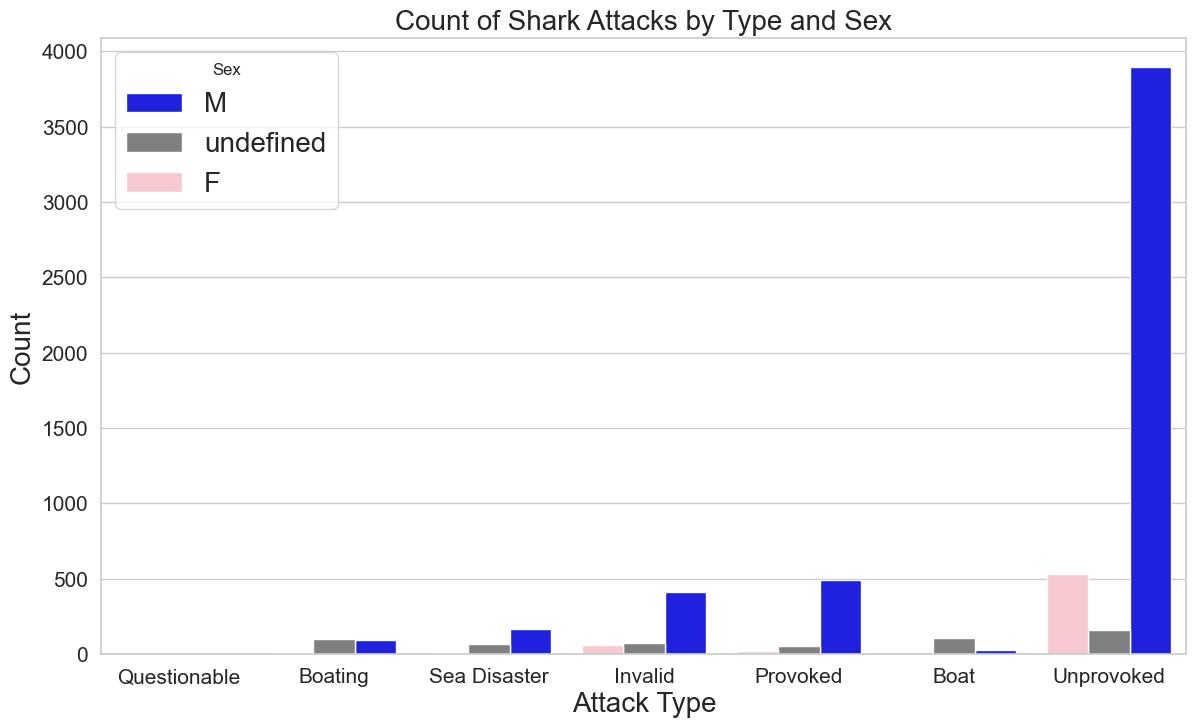

In [557]:
filtered_data = data[data['type'].isin(['Unprovoked', 'Boat', 'Provoked', 'Invalid', 'Sea Disaster', 'Boating', 'Questionable']) &
                      data['sex_'].isin(['M', 'F', 'undefined'])]

plt.figure(figsize=(14, 8))
sns.countplot(x='type', data=filtered_data, hue='sex_', palette={'M': 'blue', 'F': 'pink', 'undefined': 'grey'})

plt.title('Count of Shark Attacks by Type and Sex', fontsize=20)
plt.xlabel('Attack Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(title='Sex', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.gca().invert_xaxis()

# Show the plot
plt.show()



['Y' 'N' nan 'UNKNOWN' 'y' 'N ' ' N' '2017' 'M']


In [606]:
data['death'] = data['death'].str.strip()
data = data.dropna(subset=['death'])

valid_death_values = ['Y', 'N']
data = data[data['death'].isin(valid_death_values)]


,year,type,country,area,activity,sex_,age,injury,death,species_,index
6301,1966,Unprovoked,CEYLON (SRI LANKA),Eastern Province,Swimming,M,15.000000,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,6299
6209,1966,Unprovoked,VENEZUELA,Los Roques Islands,Spearfishing,M,27.368359,"FATAL (x3), one survived with minor injuries",Y,said to involve 2.5 m hammerhead sharks,6207
6210,1966,Unprovoked,USA,Florida,Wade-fishing,M,27.368359,"No injury, shark rammed his back",N,NaN,6208
6211,1966,Unprovoked,GREECE,Dodecanese Islands,Free diving for sponges,M,27.368359,FATAL,Y,NaN,6209
6212,1966,Boat,MOZAMBIQUE,Inhambane Province,Fishing,undefined,27.368359,"No injury to occupants, shark bumped boat",N,Whale shark,6210


In [609]:
data["death"].unique()

array(['Y', 'N'], dtype=object)

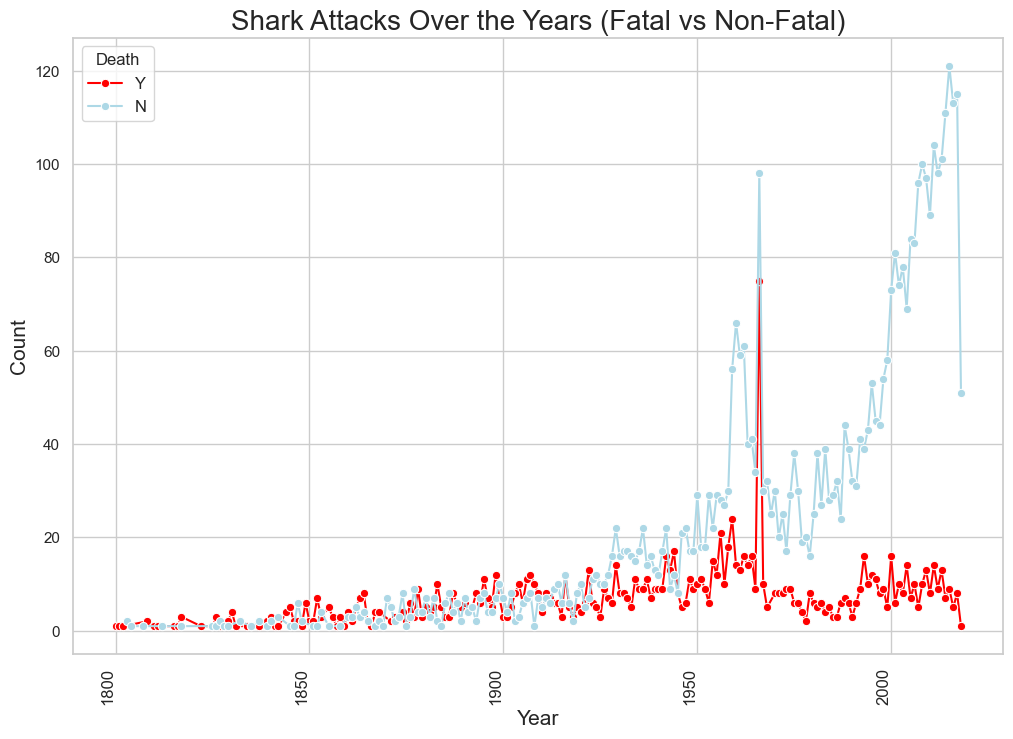

In [619]:
subset_data = data[data['death'].isin(['Y', 'N'])]

subset_data = subset_data[(subset_data['year'] >= 1800) & (subset_data['year'] <= 2020)]

plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='value', hue='death', data=subset_data.groupby(['year', 'death']).size().reset_index(name='value'), palette=['red', 'lightblue'], marker='o')

plt.title('Shark Attacks Over the Years (Fatal vs Non-Fatal)', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.legend(title='Death', fontsize=12)

# Show the plot
plt.show()



In [607]:
attacks_by_country = data['country'].value_counts().reset_index()
attacks_by_country.columns = ['country', 'total_attacks']

print(attacks_by_country)

              country  total_attacks
0                 USA           2022
1           AUSTRALIA           1204
2        SOUTH AFRICA            513
3    PAPUA NEW GUINEA            130
4         NEW ZEALAND            115
..                ...            ...
196       SAN DOMINGO              1
197            KUWAIT              1
198           IRELAND              1
199    REUNION ISLAND              1
200          MALDIVES              1

[201 rows x 2 columns]


Text(0, 0.5, 'Country')

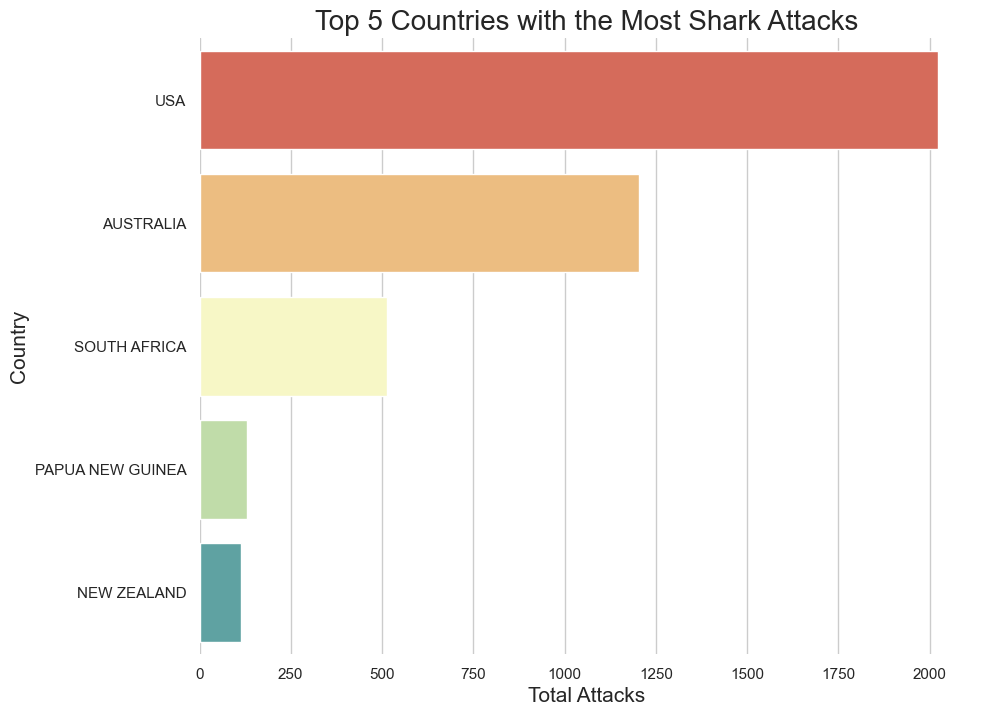

In [620]:
attacks_by_country = attacks_by_country.sort_values(by='total_attacks', ascending=False)

top_5_countries = attacks_by_country.head(5)

plt.figure(figsize=(10, 8))
sns.barplot(x='total_attacks', y='country', hue="country", data=top_5_countries, palette="Spectral")

sns.despine(left=True, bottom=True)
plt.title('Top 5 Countries with the Most Shark Attacks', fontsize=20)
plt.xlabel('Total Attacks', fontsize=15)
plt.ylabel('Country', fontsize=15)
